In [139]:
%matplotlib widget
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import numpy as np

import sys  
sys.path.insert(0, '../myimage_processing/dip_utils')

import matrix_utils as matx



## Generating images with a GAN
Once a generator has been trained with a discriminator, the nerual net state can be saved. This state includes all of the parameters and necesary information for the generator to be used again. This can also be done with the discriminator and these nerual net states are typically saved in ".pt" or ".pth" files. These files only save the nesesary data so in order for the generator or discriminator to be use4d again you must recreate the NN in the same fasion as you originally did and then load the sate. Below we will use some random noise and our pre-saved generator to generate some new images.

In [140]:
#create the nerual net using the same structure we used to train it
latent_size = 128
generator = nn.Sequential(
    # in: lantent_size x 1 x 1
    nn.ConvTranspose2d(latent_size, 512, kernel_size=4, stride =1, padding = 0, bias = False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),
    # out: 512x4x4
    
    nn.ConvTranspose2d(512,256, kernel_size=4, stride=2, padding = 1, bias =False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),
    # out: 256x8x8

    nn.ConvTranspose2d(256,128, kernel_size=4,stride =2,padding = 1, bias = False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),
    # out: 128x16x16

    nn.ConvTranspose2d(128,64, kernel_size=4, stride=2,padding=1,bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),
    # out: 64x32x32

    nn.ConvTranspose2d(64,3,kernel_size=4,stride=2,padding=1,bias=False),
    nn.Tanh()
    # out: 3x64x64
)

# Different Generators
We have a car generator and a space generator to choose from. Pick your favorite "carGen.pth" or "Space_G.pth"

In [155]:
#load our saved state into the NN
generator.load_state_dict(torch.load("carGen.pth", map_location=torch.device("cpu")))
#generator.load_state_dict(torch.load("Space_g.pth"))
generator.eval()

Sequential(
  (0): ConvTranspose2d(128, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace=True)
  (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU(inplace=True)
  (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU(inplace=True)
  (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (13): Tanh()
)

In [142]:
#create the random noise and run it through the generator
batch_size = 128
xb = torch.randn(batch_size, latent_size,1,1)
generated_images = generator(xb)

In [143]:
#functions to show images, taken from the tutorial we used to learn this (linked above)
stats = (0.5,0.5,0.5),(0.5,0.5,0.5)
def denorm(img_tensors):
    return img_tensors*stats[1][0] + stats[0][0]

def show_images(images, nmax = 64):
    fig, ax = plt.subplots(figsize =(8,8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(denorm(images.detach()[:nmax]),nrow=8).permute(1,2,0))

torch.Size([128, 3, 64, 64])


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

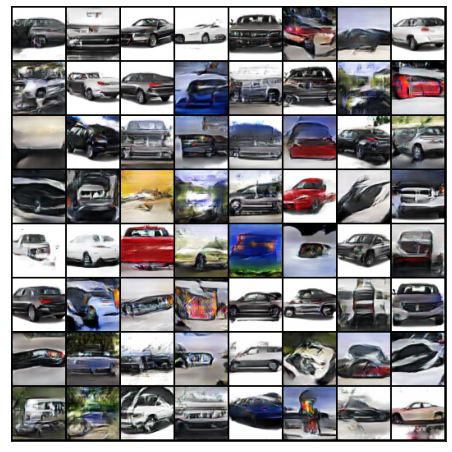

In [144]:
#show the generated images
print(generated_images.shape)
show_images(generated_images)

# Looking at the images
Now that we have generated some images take a look at some of them. We generated a batch of 128 so change the numbers around to see what we made.

In [145]:
"""This box took us an hour to make before we realized that you could just specify that you only wanted to see one image in the 
show_images function we already had *facepalm* """
#gens = generated_images.detach().permute(0, 2, 3, 1)
#matx.arr_info(gens[13])
#plt.imshow(gens[32])

'This box took us an hour to make before we realized that you could just specify that you only wanted to see one image in the \nshow_images function we already had *facepalm* '

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

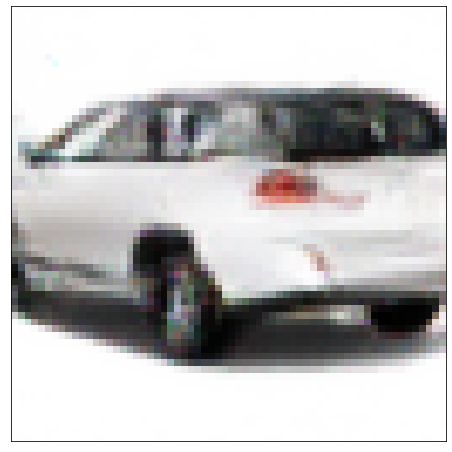

In [154]:
show_images(generated_images[7,None,...], 1)

In [147]:
matx.arr_info(generated_images[31])

(torch.Size([3, 64, 64]),
 torch.float32,
 tensor(-0.9807, grad_fn=<MinBackward1>),
 tensor(0.9999, grad_fn=<MaxBackward1>))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

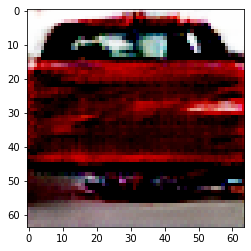

In [148]:

plt.imshow(generated_images[34,...].cpu().detach().permute(1,2,0).clip(0,1))

In [149]:
matx.arr_info(generated_images)

(torch.Size([128, 3, 64, 64]),
 torch.float32,
 tensor(-1., grad_fn=<MinBackward1>),
 tensor(1., grad_fn=<MaxBackward1>))